# Stock Market Prediction¶

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train=pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')


In [4]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [5]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0
1480,2021-12-31,17244.500000,17400.800781,17238.500000,17354.050781,17354.050781,167000.0


In [6]:
print(train.head())

         Date         Open         High          Low        Close  \
0  2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805   
1  2016-01-05  7828.399902  7831.200195  7763.250000  7784.649902   
2  2016-01-06  7788.049805  7800.950195  7721.200195  7741.000000   
3  2016-01-07  7673.350098  7674.950195  7556.600098  7568.299805   
4  2016-01-08  7611.649902  7634.100098  7581.049805  7601.350098   

     Adj Close    Volume  
0  7791.299805  134700.0  
1  7784.649902  145200.0  
2  7741.000000  147100.0  
3  7568.299805  188900.0  
4  7601.350098  157400.0  


In [7]:
train.isnull().sum()   # checking null values

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

<AxesSubplot:>

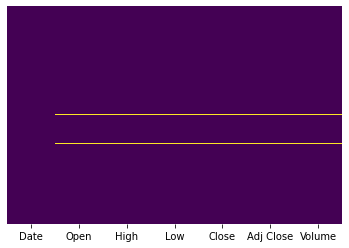

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')     # Alternative way of findind null values

In [9]:
train["Open"] = train["Open"].fillna(method='ffill')   # trying to fill missing values
train["High"] = train["High"].fillna(method='ffill')
train["Close"] = train["Close"].fillna(method='ffill')
train["Low"] = train["Low"].fillna(method='ffill')
train["Adj Close"] = train["Adj Close"].fillna(method='ffill')
train["Volume"] = train["Volume"].fillna(method='ffill')

<AxesSubplot:>

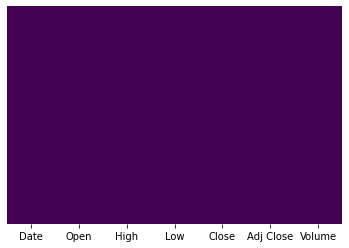

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# To get the number  of training days:

In [12]:
print("training days=",train.shape)

training days= (1481, 7)


# To visiualize the close price data:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set()

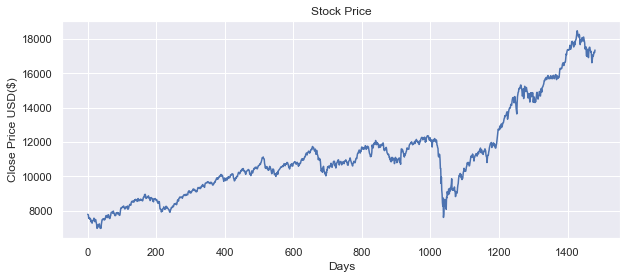

In [15]:
plt.figure(figsize=(10,4))
plt.title("Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(train['Close'])
plt.show()

#  To get close price

In [16]:
train=train[['Close']]
print(train.head())

         Close
0  7791.299805
1  7784.649902
2  7741.000000
3  7568.299805
4  7601.350098


#  creating a variable to predict 'X' days in the future

In [17]:
futureDays=25

In [18]:
#Create a new target column shifted 'X' units/day:

In [19]:
train["Prediction"]=train[["Close"]].shift(-futureDays)
print(train.head())

         Close   Prediction
0  7791.299805  7298.200195
1  7784.649902  7215.700195
2  7741.000000  6976.350098
3  7568.299805  6980.950195
4  7601.350098  7162.950195


In [20]:
print(train.tail())

             Close  Prediction
1476  17086.250000         NaN
1477  17233.250000         NaN
1478  17213.599609         NaN
1479  17203.949219         NaN
1480  17354.050781         NaN


In [22]:
import numpy as np
X=np.array(train.drop(["Prediction"],1))[:-futureDays]
print(X)

[[ 7791.299805]
 [ 7784.649902]
 [ 7741.      ]
 ...
 [17415.050781]
 [17536.25    ]
 [17026.449219]]


In [23]:
y=np.array(train["Prediction"])[:-futureDays]
print(y)

[ 7298.200195  7215.700195  6976.350098 ... 17213.599609 17203.949219
 17354.050781]


# Split the data into 75% training and 25% testing

In [24]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)

# Creating model

In [25]:
# creating the decision tree regression model
from sklearn.tree import DecisionTreeRegressor

In [49]:
tree=DecisionTreeRegressor().fit(Xtrain,ytrain)

In [50]:
# creating the  Linear Regression model
from sklearn.linear_model import LinearRegression
linear=LinearRegression().fit(Xtrain,ytrain)

In [51]:
Xfuture=train.drop(['Prediction'],1)[:-futureDays]
Xfuture=Xfuture.tail(futureDays)
Xfuture=np.array(Xfuture)
print(Xfuture)

[[18178.099609]
 [18114.900391]
 [18125.400391]
 [18268.400391]
 [18210.949219]
 [17857.25    ]
 [17671.650391]
 [17929.650391]
 [17888.949219]
 [17829.199219]
 [17916.800781]
 [18068.550781]
 [18044.25    ]
 [18017.199219]
 [17873.599609]
 [18102.75    ]
 [18109.449219]
 [17999.199219]
 [17898.650391]
 [17764.800781]
 [17416.550781]
 [17503.349609]
 [17415.050781]
 [17536.25    ]
 [17026.449219]]


#  To see the model tree prediction


In [52]:
treePrediction= tree.predict(Xfuture)
print("Decision Tree prediction=",treePrediction)

Decision Tree prediction= [17053.949219 16983.199219 17166.900391 17401.650391 17053.949219
 16912.25     18102.75     17368.25     17516.849609 17671.650391
 17368.25     17324.900391 17324.900391 17248.400391 16985.199219
 16770.849609 16770.849609 17248.400391 17072.599609 17003.75
 17086.25     18044.25     17213.599609 17203.949219 17790.349609]


#  To see the model Linear Regression prediction

In [53]:
linearPrediction=linear.predict(Xfuture)
print("Linear regression Prediction=",linearPrediction)

Linear regression Prediction= [18321.49261481 18258.63747272 18269.08030751 18411.30177168
 18354.16338147 18002.38980942 17817.80066157 18074.3960305
 18033.91644815 17974.49174546 18061.61637771 18212.54020421
 18188.3717241  18161.46821585 18018.65040613 18246.55323218
 18253.21597857 18143.56621336 18043.564804   17910.4439123
 17564.08989203 17650.4161606  17562.59805849 17683.13743179
 17176.11216249]


# Visualize decision tree prediction

In [54]:
predictions=treePrediction
valid=train[X.shape[0]:]
valid["Predictions"]=predictions


<ipython-input-54-e360f5a71620>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


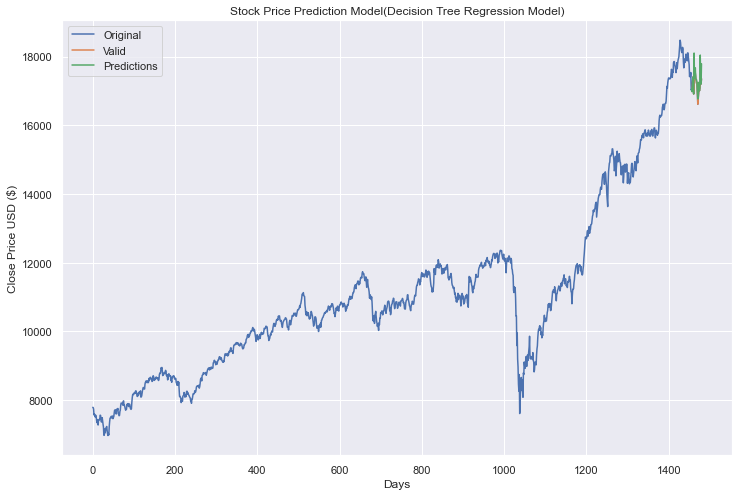

In [55]:
plt.figure(figsize=(12,8))
plt.title("Stock Price Prediction Model(Decision Tree Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()


# Visualize the linear model predictions

In [56]:
predictions=linearPrediction
valid=train[X.shape[0]:]
valid["Predictions"]=predictions

<ipython-input-56-ce2f9cd3c748>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"]=predictions


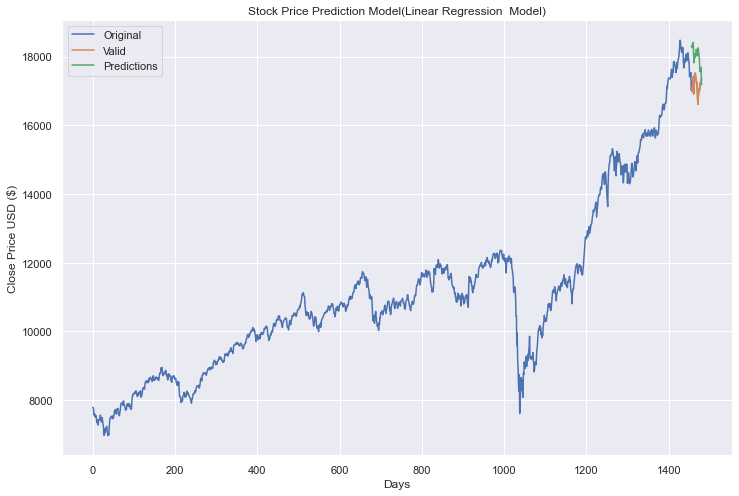

In [57]:
plt.figure(figsize=(12,8))
plt.title("Stock Price Prediction Model(Linear Regression  Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Original","Valid","Predictions"])
plt.show()